[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/4_Pruebas_Hipotesis.ipynb)

# 2.6. Pruebas de hipótesis

----

* ## ¿Qué son?

Las pruebas de hipótesis son utilizados para la toma de decisiones **estadísticas**, utilizando datos experimentales. En palabras burdas, es el pan de cada día de las estadísticas inferenciales y una habilidad crítica en el repertorio de un científico de datos.

* ## ¿Porqué usamos las pruebas de hipótesis?

Porque evalúa dos afirmaciones mutuamente excluyentes sobre una **población** para determinar qué afirmación es mejor respaldada por los datos de la *muestra*. Cuando decimos que un hallazgo es estadísticamente significativo, es gracias a una prueba de hipótesis.

![img](https://www.kdnuggets.com/wp-content/uploads/statisticaltesttree.png)

#### Hay una gran cantidad de pruebas utilizadas en el análisis estadístico para este propósito. Puede ser confuso. Consulte este excelente [artículo](https://www.statology.org/choosing-the-right-statistical-test-a-decision-tree-approach/) para obtener una descripción completa de qué prueba usar en qué situación.

---
---

* ## ¿Cuales son las bases de las hipótesis? 

 Se comienza formulando dos hipótesis opuestas:
 
  - **Hipótesis nula (H₀)**: suele representar la situación estándar o “no hay efecto”. Es la afirmación que se asume cierta provisionalmente.
  - **Hipótesis alterna (H₁)**: es lo que queremos probar, una afirmación que típicamente sugiere alguna diferencia, efecto o cambio con respecto a la situación estándar.

---
<font color="red">En una prueba de hipótesis se plantea una suposición (hipótesis nula H₀) sobre un parámetro o distribución de la población (por ejemplo, “la media de ingresos es $50k” o “no hay diferencia en la tasa de clics entre la versión A y B de un anuncio”)</font>, y 

<font color="blue">una hipótesis alterna H₁ que típicamente representa el efecto o diferencia que buscamos detectar. Mediante evidencia muestral y procedimientos estadísticos decidimos si rechazar H₀ en favor de H₁ o no rechazar H₀.</font>

---

**A continuación mostramos un pequeño ejemplo utilizando la prueba estadística Shapiro - Wilks**

Esta prueba confirma si una muestra presenta una distribución normal (H0) o no (H1). 

Mayor información de la librería pueden consultar el siguiente [artículo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) y el [artículo](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) siguiente para la prueba estadística. 

stat=0.895, p=0.193
La muestra parece seguir una distribución normal (No se rechaza H0).


Text(0, 0.5, 'Densidad')

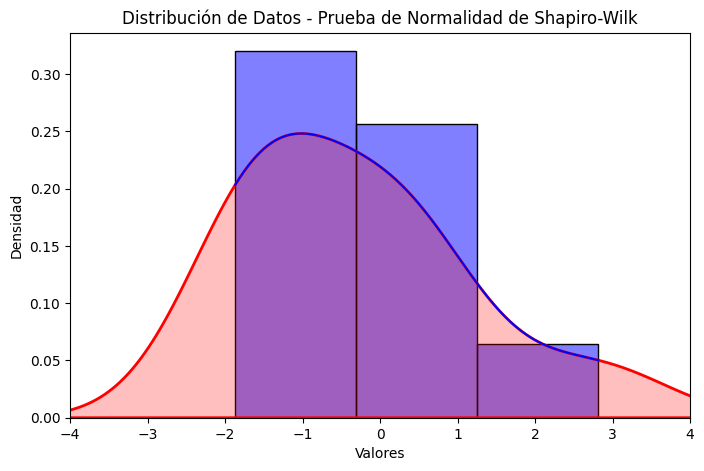

In [1]:
# Ejemplo de la prueba de normalidad Shapiro-Wilk Normality Test
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

#El valor crítico de shapiro para n = 10 es  cv = 0.842
#El estadistico calculado es stat = 0.895
#Aquí podemos ver que stat > cv  <- Aceptamos H1 (Rechazamos H0)

#Recordemos este planteamiento. Nuestros datos son Gaussianos (H0), Nuestos datos no son Gaussianos (H1)

#Del mismo estadístico tenemos que "The W statistic needs to be greater than the critical value for the 
#null hypothesis that the samples are drawn from a Gaussian distribution not to be rejected"

# Definir el nivel de significancia
alpha = 0.05

if p > alpha:
    print('La muestra parece seguir una distribución normal (No se rechaza H0).')
else:
    print('La muestra NO parece seguir una distribución normal (Se rechaza H0).')
    
# Crear un rango extendido para KDE
x_range = np.linspace(-4, 4, 1000)  # Ampliar el intervalo

# Graficar la distribución con KDE
plt.figure(figsize=(8,5))
sns.histplot(data, kde=True, bins=3, color='blue', stat="density")

# Ajustar el KDE correctamente
sns.kdeplot(data, color='red', linewidth=2, fill=True, common_norm=False)

# Ajustar el intervalo del eje X de -4 a 4
plt.xlim(-4, 4)
# Títulos y etiquetas
plt.title('Distribución de Datos - Prueba de Normalidad de Shapiro-Wilk')
plt.xlabel('Valores')
plt.ylabel('Densidad')

#Lo más recomendable es siempre basarnos en el valor del estadístico calculado (stat)
#y tener un conocimiento de los valores críticos

#Recordemos lo siguiente de la tabla de confusión

#FF <- H0    FV <- Error Tipo 1
#VF <- ET2   VV <- H1

#Cuando ustedes tienen conocimiento de los estadísticos y los valores críticos

#lo ideal es realizar esta comparación para las pruebas de hipótesis
# Si STAT <= CV  <- Aceptamos H0 (Rechazamos H1)
# Si STAT >  CV  <- Aceptamos H1 (Rechazamos H0)


#Caso contrario, les había explicado que podríamos utilizar
#la evaluación de el valor de p-value  contra el alpha

#Pero al utilizar p-value, las comparaciones pueden ser algo ambigüas, por el simple hecho de
#estar ajustandolo para entender la respuesta de las pruebas de hipótesis.

#Alpha <- Nivel de Significancia o Nivel de Confianza

Statistic=0.981, p-value=0.596
La muestra parece seguir una distribución normal (No se rechaza H0).


Text(0, 0.5, 'Densidad')

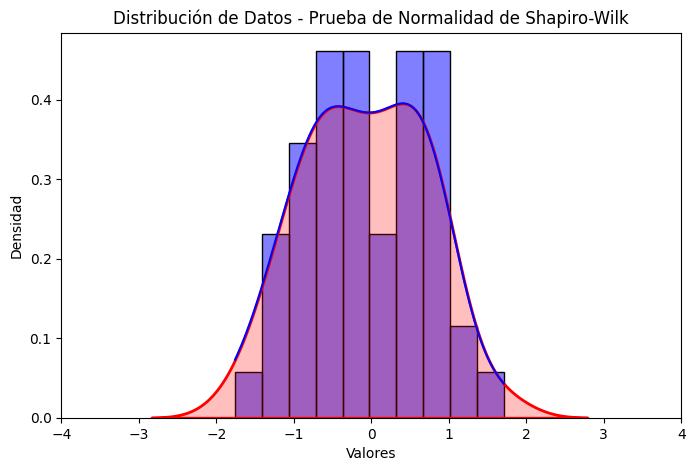

In [2]:
# Fijar semilla para reproducibilidad
np.random.seed(1984)

# Generar datos aleatorios con distribución normal
muestras = np.random.normal(0, 1, 50)

# Prueba de normalidad de Shapiro-Wilk
stat, p = shapiro(muestras)
print(f'Statistic={stat:.3f}, p-value={p:.3f}')

# Definir el nivel de significancia
alpha = 0.05

# Evaluar la hipótesis nula
if p > alpha:
    print('La muestra parece seguir una distribución normal (No se rechaza H0).')
else:
    print('La muestra NO parece seguir una distribución normal (Se rechaza H0).')

# Ampliar el rango para el KDE
x_range = np.linspace(-4, 4, 1000)

# Graficar la distribución con KDE mejorado
plt.figure(figsize=(8,5))
sns.histplot(muestras, bins=10, kde=True, color='blue', stat="density")

# Agregar KDE con relleno y mayor precisión
sns.kdeplot(muestras, color='red', linewidth=2, fill=True, common_norm=False)

# Ajustar el intervalo del eje X de -4 a 4 para visualizar mejor la curva KDE
plt.xlim(-4, 4)

# Títulos y etiquetas
plt.title('Distribución de Datos - Prueba de Normalidad de Shapiro-Wilk')
plt.xlabel('Valores')
plt.ylabel('Densidad')



#En resumen, el p-value tomara la referencia de desigualdad p > a
# Si y solo si el estadístico así lo indica
# La definición de la prueba de shapiro es que si el estadístico es mayor que el valor crítico
# entonces la muestra es gaussiana, aquí estamos trabajando con la hipótesis nula (H0) de que 
# no "sabemos" que tipo de distribución tienen nuestros datos.

# Al ser un caso "especial", H1 debe ser que los datos presentarán una distribución Normal

A partir de aquí surgen diversas cuestiones extrañas...

### ¿Qué son las pruebas estadísticas?
* ### ¿Qué es el valor de la prueba (estadística)? 

    * $\alpha$ (nivel de significancia) 
    * $(p - value)$ 
    * [valor crítico](https://scistatcalc.blogspot.com/2013/09/critical-value-of-w-statistic.html?m=0)


# 2.7. Definición de error Tipo I  y  error Tipo II

---

Este proceso conlleva dos posibles tipos de error: 

 -  un error Tipo I ocurre si rechazamos H₀ siendo ésta verdadera (falso positivo), y
 -  un error Tipo II ocurre si no rechazamos H₀ cuando en realidad es falsa (falso negativo).

En otras palabras, “un error Tipo I ocurre cuando se concluye erróneamente que hay una diferencia... mientras que un error Tipo II ocurre cuando no se detecta una diferencia real”. 

![alt text](https://dp8v87cz8a7qa.cloudfront.net/45396/5bd20d03240611540492547.png)

---

La probabilidad de error Tipo I se denota con α (nivel de significancia) y es fijada de antemano (comúnmente 0.05 o 5%). Este α es el umbral máximo de probabilidad de cometer un falso positivo que estamos dispuestos a tolerar. 
Por ejemplo, α = 0.05 implica aceptar un 5% de riesgo de afirmar un efecto que realmente no existe. La probabilidad de error Tipo II se denota β, y su complemento (1–β) se conoce como la potencia de la prueba. 
La potencia (1–β) es la probabilidad de detectar un efecto real de cierto tamaño; aumentar el tamaño de muestra o elegir pruebas más sensibles puede aumentar la potencia y reducir β

![img](https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_12_image-127.jpg)

---

# 2.8. Definición de p-value y alpha

---

🔹 **1. ¿Qué es el valor p (p-value)?**

El p-value es la probabilidad de obtener un resultado igual o más extremo que el observado bajo la suposición de que la hipótesis nula (H₀) es verdadera.

En términos simples, el valor p mide qué tan probable es que los datos observados ocurran por puro azar si H₀ es cierta.

📌 Regla de decisión basada en el p-valor:

Si p ≤ α → Se rechaza la Hipótesis Nula (H₀) → Hay suficiente evidencia para aceptar H₁ (los datos no siguen la distribución esperada).
Si p > α → No se rechaza H₀ → No hay suficiente evidencia para descartar la normalidad de los datos.

🔹 **2. ¿Qué es el Nivel de Significancia (α)?**

El nivel de significancia (α) es un umbral que establecemos antes de realizar la prueba, y nos indica cuánta probabilidad estamos dispuestos a aceptar de cometer un error al rechazar H₀ cuando en realidad es verdadera.

📌 El valor más común es α = 0.05 (5%), lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de error al rechazar H₀.

📌 Ejemplo de interpretación:

Si α = 0.05, significa que en 5 de cada 100 pruebas podríamos obtener un resultado falso positivo (rechazar H₀ cuando es verdadera).
Si α = 0.01 (1%), el criterio es más estricto y queremos un 99% de confianza antes de rechazar H₀.

[liga](https://blog.minitab.com/en/adventures-in-statistics-2/how-to-correctly-interpret-p-values)

---

**Ejemplo:**

Imagina que eres un detective y quieres saber si una moneda es "tramposa" o si realmente es justa (tiene la misma probabilidad de caer en cara o cruz).

Tu amigo dice que la moneda es normal (H₀: La moneda es justa), pero tú tienes dudas (H₁: La moneda no es justa). Decides hacer un experimento: lanzas la moneda 100 veces y anotas cuántas veces cae en cara.

Si la moneda fuera justa, esperaríamos cerca de 50 caras y 50 cruces. Pero si obtienes 90 caras y solo 10 cruces, eso parece sospechoso. 

📌 Ejemplo sencillo:

Si el valor P es 0.03 y α = 0.05, como P < α, rechazamos H₀.
Si el valor P es 0.07 y α = 0.05, como P > α, no rechazamos H₀.

Estadístico Z: 8.00
Valor P: 0.00000
Valor critico: 1.95996


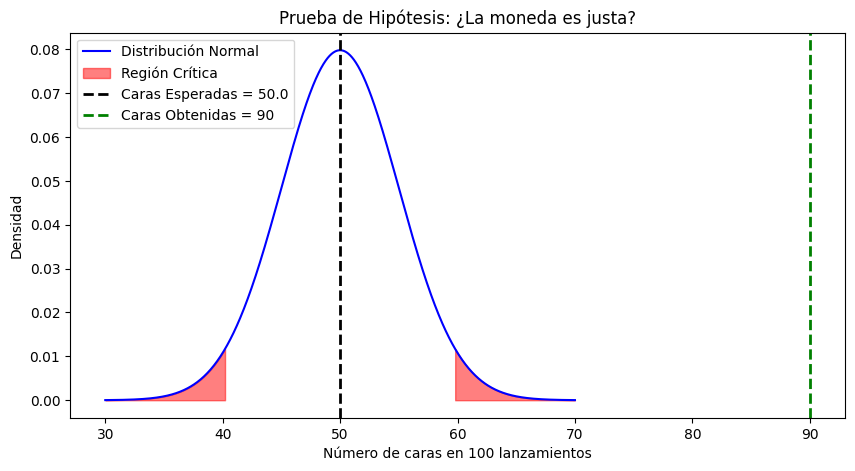

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulamos 100 lanzamientos de una moneda justa (50% cara, 50% cruz)
n_lanzamientos = 100
caras_esperadas = n_lanzamientos / 2  # Si la moneda es justa, esperaríamos 50 caras
caras_obtenidas = 90  # Supongamos que en el experimento obtuvimos 90 caras

# Calculamos el estadístico Z
z_score = (caras_obtenidas - caras_esperadas) / np.sqrt(n_lanzamientos * 0.5 * 0.5)

# Calculamos el valor P (dos colas porque puede haber muchas caras o muy pocas)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Estadístico Z: {z_score:.2f}")
print(f"Valor P: {p_value:.5f}")

# 📈 Visualización de la distribución normal con la región crítica
x = np.linspace(caras_esperadas - 4 * np.sqrt(n_lanzamientos * 0.5 * 0.5), 
                caras_esperadas + 4 * np.sqrt(n_lanzamientos * 0.5 * 0.5), 1000)
y = stats.norm.pdf(x, caras_esperadas, np.sqrt(n_lanzamientos * 0.5 * 0.5))

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Distribución Normal", color="blue")

# Región crítica para α = 0.05
alpha = 0.05
z_critico = stats.norm.ppf(1 - alpha/2)

print(f"Valor critico: {z_critico:.5f}")
x_critico_izq = np.linspace(caras_esperadas - 4 * np.sqrt(n_lanzamientos * 0.5 * 0.5), 
                            caras_esperadas - z_critico * np.sqrt(n_lanzamientos * 0.5 * 0.5), 100)
x_critico_der = np.linspace(caras_esperadas + z_critico * np.sqrt(n_lanzamientos * 0.5 * 0.5), 
                            caras_esperadas + 4 * np.sqrt(n_lanzamientos * 0.5 * 0.5), 100)

plt.fill_between(x_critico_izq, stats.norm.pdf(x_critico_izq, caras_esperadas, np.sqrt(n_lanzamientos * 0.5 * 0.5)), 
                 color='red', alpha=0.5, label="Región Crítica")
plt.fill_between(x_critico_der, stats.norm.pdf(x_critico_der, caras_esperadas, np.sqrt(n_lanzamientos * 0.5 * 0.5)), 
                 color='red', alpha=0.5)

# Línea de la media esperada y la media obtenida
plt.axvline(caras_esperadas, color="black", linestyle="dashed", linewidth=2, label=f"Caras Esperadas = {caras_esperadas}")
plt.axvline(caras_obtenidas, color="green", linestyle="dashed", linewidth=2, label=f"Caras Obtenidas = {caras_obtenidas}")

plt.legend()
plt.title("Prueba de Hipótesis: ¿La moneda es justa?")
plt.xlabel("Número de caras en 100 lanzamientos")
plt.ylabel("Densidad")
plt.show()


📌 ¿Qué significa esto?

El estadístico Z = 8.00 indica que el número de caras obtenidas está muy lejos del valor esperado (50).
El valor P = 0.00000 es mucho menor que los niveles de significancia 0.05 y 0.01.
Como P < 0.05 y P < 0.01, rechazamos la hipótesis de que la moneda es justa con alta confianza.

📌 Si P hubiera sido 0.03:

Rechazamos H₀ con α = 0.05, pero no con α = 0.01.
Significa que estamos 95% seguros de que la moneda es tramposa, pero no 99% seguros.
📌 Si P hubiera sido 0.07:

No rechazamos H₀ con α = 0.05 → No hay suficiente evidencia para decir que la moneda es injusta.

---

# 2.9. Pruebas de Hipótesis - Paramétricas

---

### 2.9.1 Prueba T (t  de Student)

Una prueba t es un tipo de estadística inferencial que se utiliza para determinar si existe una diferencia significativa entre las medias de dos grupos que pueden estar relacionadas en ciertas características. 

Se usa principalmente cuando los conjuntos de datos, como el conjunto de datos registrados como resultado de lanzar una moneda 100 veces, seguirían una distribución normal y pueden tener variaciones desconocidas. La prueba T se usa como una herramienta de prueba de hipótesis, que permite probar un supuesto aplicable a una población.

---

Nota: Para la comparación de la dispersión se utiliza la prueba Fisher's Test (Comparación de varianzas o desviaciones estandar)

---

* Prueba t de una muestra: La prueba t de una muestra determina si la media muestral es estadísticamente diferente de una media poblacional conocida o hipotética. La prueba t de una muestra es una **prueba paramétrica**.

### Breve ejemplo

📌 **Prueba T de una muestra**

Vamos a suponer que tenemos un conjunto de datos sobre el peso promedio de una muestra de estudiantes y queremos determinar si este es diferente al peso promedio de la población (μ = 70 kg).

📌 **Hipótesis para prueba de dos colas**:

H₀ (Hipótesis Nula): La media de la muestra es igual a la media de la población (μ = 70).

H₁ (Hipótesis Alternativa): La media de la muestra es diferente a la media de la población (μ ≠ 70).

📌 **Hipótesis para prueba de una cola**:

H₀: La media de la muestra es menor o igual a la media de la población (μ ≤ 70).

H₁: La media de la muestra es mayor que la media de la población (μ > 70).

71.0592655207448 70
Estadístico T: 1.29
Valor P: 0.20749
No se rechaza H₀: No hay suficiente evidencia para decir que la media de la muestra es diferente a 70 kg.


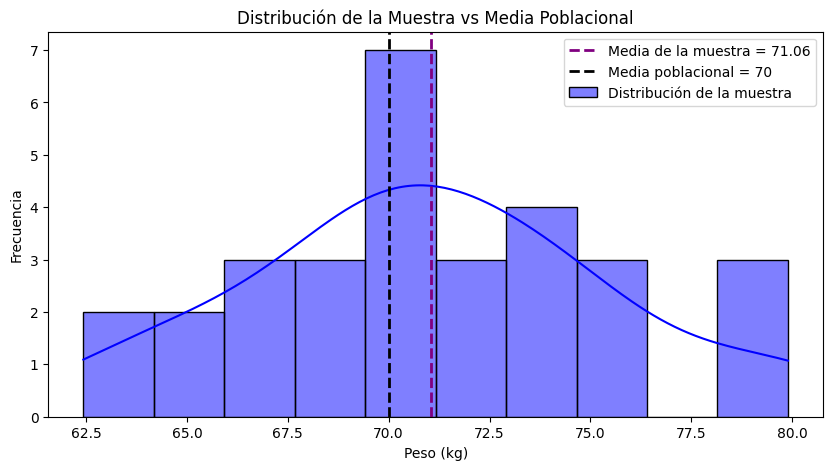

In [4]:
import numpy as np
import scipy.stats as stats

# Datos de la muestra (pesos de estudiantes en kg)
np.random.seed(42)  # Fijamos la semilla para reproducibilidad
muestra = np.random.normal(loc=72, scale=5, size=30)  # Media de 72 kg, desviación estándar de 5 kg

# Parámetro poblacional conocido
media_poblacional = 70

# Realizar la prueba T para dos colas
t_stat, p_value = stats.ttest_1samp(muestra, media_poblacional)
print(muestra.mean(), media_poblacional)
# Nivel de significancia
alpha = 0.05

# Resultados
print(f"Estadístico T: {t_stat:.2f}")
print(f"Valor P: {p_value:.5f}")

# Evaluación de hipótesis
if p_value < alpha:
    print("Rechazamos H₀: La media de la muestra es significativamente diferente a 70 kg.")
else:
    print("No se rechaza H₀: No hay suficiente evidencia para decir que la media de la muestra es diferente a 70 kg.")

# Gráfica de la muestra con la media muestral y la media poblacional
plt.figure(figsize=(10, 5))
sns.histplot(muestra, bins=10, kde=True, color='blue', alpha=0.5, label="Distribución de la muestra")
plt.axvline(muestra.mean(), color='purple', linestyle="dashed", linewidth=2, label=f"Media de la muestra = {muestra.mean():.2f}")
plt.axvline(media_poblacional, color='black', linestyle="dashed", linewidth=2, label=f"Media poblacional = {media_poblacional}")

plt.legend()
plt.title("Distribución de la Muestra vs Media Poblacional")
plt.xlabel("Peso (kg)")
plt.ylabel("Frecuencia")
plt.show()

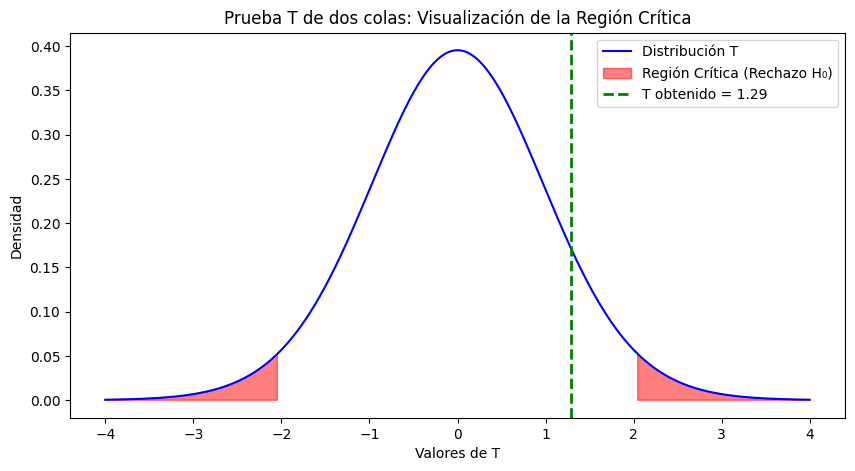

In [5]:
import matplotlib.pyplot as plt

# Gráfica de distribución T con región crítica para α = 0.05
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=len(muestra)-1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Distribución T", color="blue")

# Área de rechazo en una prueba de dos colas
t_critico = stats.t.ppf(1 - alpha/2, df=len(muestra)-1)
plt.fill_between(x, 0, y, where=(x > t_critico) | (x < -t_critico), color='red', alpha=0.5, label="Región Crítica (Rechazo H₀)")

# Línea del estadístico T obtenido
plt.axvline(t_stat, color="green", linestyle="dashed", linewidth=2, label=f"T obtenido = {t_stat:.2f}")

plt.legend()
plt.title("Prueba T de dos colas: Visualización de la Región Crítica")
plt.xlabel("Valores de T")
plt.ylabel("Densidad")
plt.show()


## ¿Por qué usar una prueba de una cola o dos colas?

Imagina que estás lanzando una pelota y quieres saber si puedes lanzar más lejos que antes.

### **Prueba de una cola** (Solo nos interesa una dirección)
Si tu reto es lanzar la pelota **más lejos**, **no importa si lanzas más cerca**. Solo te interesa si el tiro fue **mayor** que tu récord anterior.

#### **Ejemplo:**
Una nueva medicina para correr más rápido. Queremos saber si ayuda, **pero no nos importa si te hace más lento**.  

- **H₀ (Hipótesis Nula):** La medicina no cambia la velocidad.
- **H₁ (Hipótesis Alternativa):** La medicina hace que corras más rápido.

#### **Gráfica de una cola**  
Si el resultado cae en la **región crítica** (lado derecho de la curva), **rechazamos H₀** y decimos que la medicina funciona.

---

### **Prueba de dos colas** (Nos importan ambos lados)
Ahora imagina que tu reto es lanzar la pelota **a la misma distancia de siempre**.  

- **Si lanzas más lejos o más cerca**, significa que **algo cambió**.
- Ya no solo te interesa lanzar más lejos, sino también si lanzas más cerca.

#### **Ejemplo:**
Queremos saber si el peso promedio de las personas ha cambiado.  

- **H₀:** El peso promedio sigue igual.
- **H₁:** El peso promedio es diferente (puede ser mayor o menor).

#### **Gráfica de dos colas**  
Si el resultado cae en **cualquiera** de las **dos regiones críticas**, **rechazamos H₀** y concluimos que el peso cambió.

---

### **¿Cuándo usar una o dos colas?**

| **Tipo de Prueba** | **Ejemplo** | **¿Nos importa si sube o baja?** |
|------------------|------------|-----------------------------|
| **Una Cola (derecha)** | ¿Un suplemento aumenta la memoria? | No, solo nos interesa si sube |
| **Una Cola (izquierda)** | ¿Un medicamento disminuye la presión arterial? | No, solo nos interesa si baja |
| **Dos Colas** | ¿El salario promedio cambió este año? | Sí, nos importa si sube o baja |

#### **Regla fácil:**
- **Si te importa solo una dirección** (más o menos) → Usa una prueba de una cola.  
- **Si te importa cualquier cambio** (arriba o abajo) → Usa una prueba de dos colas.  


---
---

### 2.9.2 Análisis de Varianza (ANOVA) - Comparando más de dos grupos

La prueba **t** funciona bien cuando queremos comparar **dos** grupos.  
Pero, ¿qué pasa si tenemos **más de dos**?  
Si hacemos muchas pruebas **t** separadas, aumentamos el riesgo de cometer un **Error Tipo I** (falso positivo).  

Aquí es donde entra **ANOVA** (Análisis de Varianza).  
Nos permite comparar múltiples grupos **al mismo tiempo** para ver si hay **diferencias significativas** entre sus medias.  

---

#### Ejemplo: Comparando calificaciones de estudiantes en 3 escuelas**  

Supongamos que tenemos tres escuelas y queremos saber si los estudiantes de una escuela tienen calificaciones **significativamente diferentes** de las otras.  

Para esto, usamos **ANOVA de una vía** (One-Way ANOVA).  

![alt text](https://3.bp.blogspot.com/-PDWTzbbwx54/XEbYzExO9rI/AAAAAAAAAAM/AOvAPbXYVUcxmVKnWWrtQaiZ0qhIHo9vwCLcBGAs/s1600/ANOVA.png)

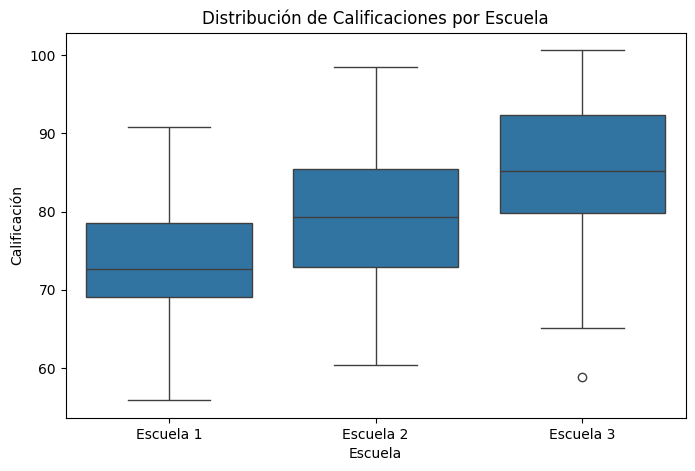

In [6]:
import pandas as pd

# Fijamos la semilla para reproducibilidad
np.random.seed(42)

# Simulamos calificaciones de estudiantes en 3 escuelas
escuela_1 = np.random.normal(loc=75, scale=10, size=30)  # Media 75, Desviación 10
escuela_2 = np.random.normal(loc=80, scale=10, size=30)  # Media 80, Desviación 10
escuela_3 = np.random.normal(loc=85, scale=10, size=30)  # Media 85, Desviación 10

# Convertimos a un DataFrame para visualización
df = pd.DataFrame({
    "Calificación": np.concatenate([escuela_1, escuela_2, escuela_3]),
    "Escuela": ["Escuela 1"] * 30 + ["Escuela 2"] * 30 + ["Escuela 3"] * 30
})

# Visualizamos la distribución de calificaciones por escuela
plt.figure(figsize=(8, 5))
sns.boxplot(x="Escuela", y="Calificación", data=df)
plt.title("Distribución de Calificaciones por Escuela")
plt.show()

In [7]:
# Prueba ANOVA
f_stat, p_value = stats.f_oneway(escuela_1, escuela_2, escuela_3)

# Resultados
print(f"Estadístico F: {f_stat:.2f}")
print(f"Valor P: {p_value:.5f}")

# Evaluación de hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: Hay una diferencia significativa entre al menos dos escuelas.")
else:
    print("No se rechaza H₀: No hay suficiente evidencia para decir que hay diferencias entre las escuelas.")


Estadístico F: 12.21
Valor P: 0.00002
Rechazamos H₀: Hay una diferencia significativa entre al menos dos escuelas.


**Interpretación de resultados**

El estadístico F mide cuánto varían las calificaciones dentro de cada grupo comparado con la variación total.
Un F grande indica que las diferencias entre grupos son más grandes que las diferencias dentro de los grupos.

El valor P nos dice si la diferencia es significativa:

 -  Si P < 0.05, significa que al menos un grupo es significativamente diferente de los demás.

 -  Si P > 0.05, no hay evidencia suficiente para decir que los grupos son diferentes.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Escuela 1 Escuela 2   5.6698 0.0567 -0.1286 11.4683  False
Escuela 1 Escuela 3  12.0103    0.0  6.2119 17.8087   True
Escuela 2 Escuela 3   6.3405 0.0287  0.5421 12.1389   True
----------------------------------------------------------


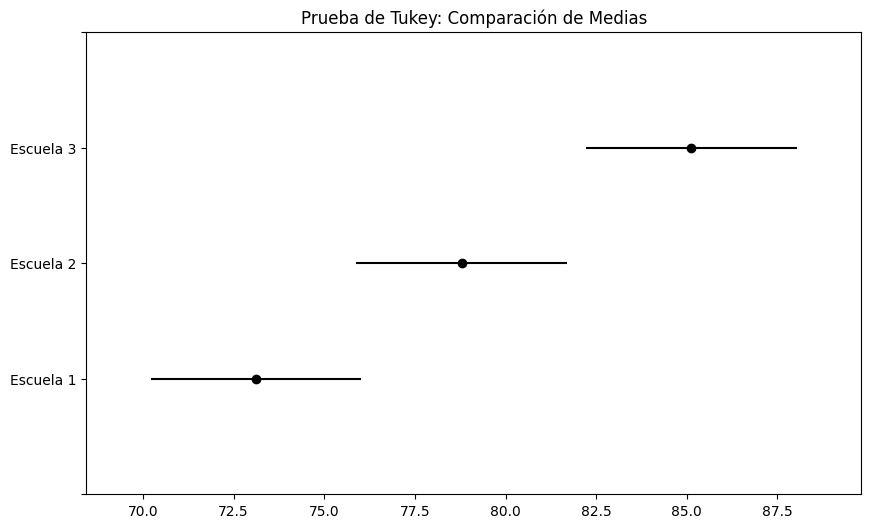

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizamos la prueba de Tukey
tukey = pairwise_tukeyhsd(df["Calificación"], df["Escuela"], alpha=0.05)
print(tukey)

# Visualizamos los intervalos de confianza
fig, ax = plt.subplots(figsize=(8, 5))
tukey.plot_simultaneous(ax=ax)
plt.title("Prueba de Tukey: Comparación de Medias")
plt.show()

#### **Prueba de Tukey HSD: Comparación de Múltiples Medias**

Cuando realizamos un **ANOVA**, este nos dice **si hay diferencias** entre los grupos, pero **no nos indica dónde están esas diferencias**.  
Para averiguarlo, usamos una **prueba post-hoc**, como la **Prueba de Tukey HSD (Honestly Significant Difference).**  

---

#### **¿Qué es la prueba de Tukey?**
La prueba **Tukey HSD** compara todas las medias de los grupos entre sí y nos dice **qué pares de grupos tienen diferencias significativas**.

- Se usa cuando hemos hecho un **ANOVA significativo**.
- Controla el **Error Tipo I** (falsos positivos).
- Compara las diferencias de medias con un **valor crítico** para determinar si son **estadísticamente significativas**.

---

#### **Fórmula de Tukey HSD**

La diferencia mínima significativa entre dos grupos se calcula con:

$$
HSD = q \times \sqrt{\frac{MS_{error}}{n}}
$$

Donde:

- \( HSD \) = **Diferencia mínima significativa** entre medias.
- \( q \) = **Estadístico de Tukey** basado en la distribución de rangos estudiantiles.
- \( MS_{error} \) = **Media de los cuadrados del error** (obtenida en ANOVA).
- \( n \) = **Número de observaciones por grupo**.

Si la diferencia entre dos medias es **mayor o igual** que \( HSD \), se considera **significativa**.

---

#### **Interpretación de los Resultados**

| **Comparación** | **Diferencia de Medias** | **Valor P** | **Intervalo de Confianza** | **Diferencia Significativa?** |
|---------------|-------------------|---------|------------------------|--------------------------|
| Escuela 1 vs Escuela 2 | 5.67 | 0.0567 | (-0.1286, 11.4683) | ❌ No significativa |
| Escuela 1 vs Escuela 3 | 12.01 | 0.0000 | (6.2119, 17.8087) | ✅ Sí, hay diferencia |
| Escuela 2 vs Escuela 3 | 6.34 | 0.0287 | (0.5421, 12.1389) | ✅ Sí, hay diferencia |

#### **Conclusión**
1. **Escuela 1 y Escuela 2** → No hay suficiente evidencia para decir que sus medias son diferentes.
2. **Escuela 1 y Escuela 3** → Hay una diferencia significativa entre sus medias.
3. **Escuela 2 y Escuela 3** → También hay una diferencia significativa.


### Cálculo del Estadístico de Tukey HSD

La prueba de **Tukey HSD** se basa en un estadístico llamado **Q de Tukey**, que mide la diferencia entre las medias de los grupos en relación con la variabilidad dentro de los grupos.

---

#### Fórmula del Estadístico de Tukey
El estadístico \( Q \) de Tukey se calcula de la siguiente manera:

$$
Q = \frac{\bar{X}_i - \bar{X}_j}{\sqrt{\frac{MS_{error}}{n}}}
$$

| Símbolo | Descripción |
|----------|--------------------------------|
| $$\bar{X}_i, \bar{X}_j$$ | Medias de los grupos comparados |
| $$MS_{error}$$ | Media de los cuadrados del error en ANOVA |
| $$n$$ | Número de observaciones por grupo |

Si Q es mayor que el **valor crítico** de la distribución de Tukey, la diferencia es **significativa**.

---

#### ¿De dónde sale el MS_{error}?
El error proviene del **ANOVA** y se calcula como:

$$
MS_{error} = \frac{SS_{error}}{df_{error}}
$$

| Símbolo | Descripción |
|----------|----------------------------------------|
| $$SS_{error}$$ | Suma de los cuadrados del error |
| $$df_{error}$$ | Grados de libertad del error ($ n_{total} - k $) |

El error nos da una medida de la **variabilidad dentro de los grupos**.

---

#### Intervalos de Confianza en Tukey**
Cada comparación de medias tiene un **intervalo de confianza (IC)** para la diferencia entre grupos:

$$
IC = (\bar{X}_i - \bar{X}_j) \pm q_{crit} \times \sqrt{\frac{MS_{error}}{n}}
$$

| Símbolo | Descripción |
|----------|-------------------------------------------|
| $$q_{crit}$$ | Valor crítico de la distribución de Tukey |
| $$\bar{X}_i - \bar{X}_j$$ | Diferencia entre medias de los grupos |
| $$MS_{error}$$ | Media de los cuadrados del error |
| $$n$$ | Número de observaciones por grupo |

#### ¿Cómo interpretar el intervalo de confianza?
- **Si el intervalo de confianza incluye el 0**, significa que la diferencia **no es significativa**.
- **Si el intervalo de confianza NO incluye el 0**, significa que la diferencia **es significativa**.
.


---

### 2.9.3 Prueba Chi-Cuadrada: Bondad de Ajuste y Asociación

La prueba **Chi-cuadrada** es una prueba de hipótesis que compara la distribución observada con una distribución esperada en datos categóricos. Se usa para responder preguntas como:

- **¿Los datos observados se ajustan a una distribución teórica?** (Bondad de ajuste)
- **¿Existe una relación entre dos variables categóricas?** (Asociación/Independencia)

---

### ** Prueba de Bondad de Ajuste**

La **prueba de bondad de ajuste** se usa para verificar si una muestra de datos sigue una distribución teórica.

### **Fórmula de la Chi-Cuadrada**

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

| Símbolo | Descripción |
|----------|--------------------------------|
| $$\chi^2$$ | Estadístico de Chi-Cuadrado |
| $$O_i$$ | Frecuencia observada |
| $$E_i$$ | Frecuencia esperada |

### **Ejemplo: ¿Un dado es justo?**
Supongamos que lanzamos un dado 100 veces y registramos la cantidad de veces que salió cada número.

| Cara del Dado | Observado (O) | Esperado (E) |
|--------------|-------------|-------------|
| 1 | 18 | 16.67 |
| 2 | 15 | 16.67 |
| 3 | 17 | 16.67 |
| 4 | 20 | 16.67 |
| 5 | 16 | 16.67 |
| 6 | 14 | 16.67 |

Aplicamos la fórmula de **Chi-Cuadrado** para calcular si hay una diferencia significativa.

---

Estadístico Chi-cuadrado: 1.40
Valor P: 0.92431
No se rechaza H₀: No hay suficiente evidencia para decir que el dado es injusto.


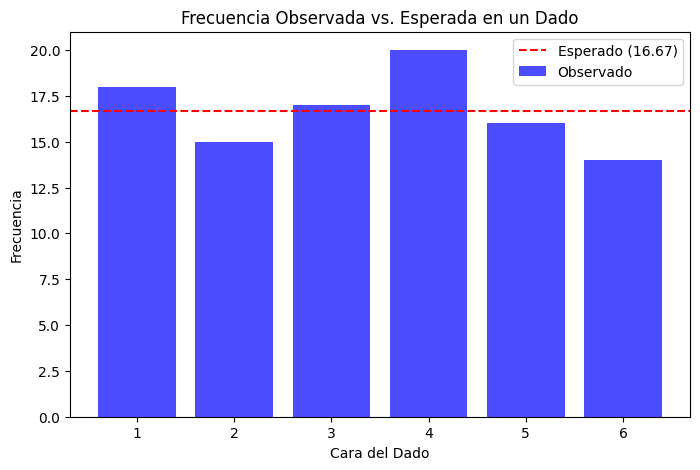

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos observados (resultados de lanzar el dado 100 veces)
observed = np.array([18, 15, 17, 20, 16, 14])  # Frecuencia observada para cada cara

# Frecuencia esperada si el dado fuera justo
expected = np.full(6, 100/6)  # 100 lanzamientos, 6 caras → 16.67 por cada una

# Calculamos la prueba Chi-Cuadrado
chi2_stat, p_value = stats.chisquare(observed, expected)

# Resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.2f}")
print(f"Valor P: {p_value:.5f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: El dado NO es justo.")
else:
    print("No se rechaza H₀: No hay suficiente evidencia para decir que el dado es injusto.")

# Visualización de los resultados
plt.figure(figsize=(8,5))
plt.bar(range(1, 7), observed, alpha=0.7, label="Observado", color="blue")
plt.axhline(y=expected[0], color='red', linestyle='dashed', label="Esperado (16.67)")
plt.xlabel("Cara del Dado")
plt.ylabel("Frecuencia")
plt.title("Frecuencia Observada vs. Esperada en un Dado")
plt.legend()
plt.show()

### Interpretación de los Resultados

 -  Si el valor P es <= a 0.05, rechazamos 𝐻0 y concluimos que el dado no es justo.
 -  Si el valor P es > a 0.05, no tenemos suficiente evidencia para decir que el dado es injusto.

Conclusión: En este caso, como el valor P es mayor a 0.05, no podemos afirmar que el dado está cargado. Puede haber pequeñas variaciones, pero no son lo suficientemente grandes como para ser estadísticamente significativas.

---

#### Prueba de Asociación e Independencia

Las **pruebas de independencia y asociación** determinan si existe una relación entre dos variables categóricas. Se utilizan en encuestas, estudios de mercado y ciencias sociales.

- **Prueba de asociación:** ¿Las ventas de automóviles dependen de la ciudad?
- **Prueba de independencia:** ¿El voto de una persona es independiente de su género?

La fórmula es la misma que en la prueba de bondad de ajuste, pero aplicada a una tabla de contingencia.

#### **Ejemplo: Encuesta Electoral**
Supongamos que realizamos una encuesta electoral a **500 personas** y obtenemos los siguientes resultados:

| **Preferencia de Voto** | **Hombres** | **Mujeres** | **Total** |
|-------------------------|------------|------------|----------|
| **Candidato A**         | 120        | 150        | 270      |
| **Candidato B**         | 100        | 130        | 230      |
| **Total**               | 220        | 280        | 500      |

Aplicamos la **prueba Chi-cuadrada** para ver si existe una relación entre género y preferencia política.

#### Planteamiento de la Hipótesis

- **Hipótesis nula H0**: **El género y la preferencia de voto son independientes**, es decir, el género NO influye en el voto.
- **Hipótesis alternativa H1**: **El género y la preferencia de voto NO son independientes**, es decir, el género SÍ influye en el voto.

---

Si **el género y la preferencia de voto fueran independientes**, esperaríamos que los votantes se distribuyan proporcionalmente en cada categoría.

Para calcular los valores esperados en cada celda, usamos la fórmula:

$$
E_{ij} = \frac{(\text{Total Fila}) \times (\text{Total Columna})}{\text{Total General}}
$$

Donde:
- $\ E_{ij} $ es el **valor esperado** para la celda en la fila \( i \) y columna \( j \).
- **Total Fila** es la suma de votantes de una opción.
- **Total Columna** es la suma de votantes de un género.
- **Total General** es el total de la encuesta (500).

In [10]:
# Datos observados en la tabla de contingencia
observed = np.array([[120, 150],  # Votos por Candidato A
                     [100, 130]]) # Votos por Candidato B

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

# Resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.2f}")
print(f"Valor P: {p_value:.5f}")
print(f"Grados de libertad: {dof}")
print("\nMatriz de valores esperados:")
print(pd.DataFrame(expected, columns=["Hombres", "Mujeres"], index=["Candidato A", "Candidato B"]))

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: Existe una relación entre el género y la preferencia de voto.")
else:
    print("No se rechaza H₀: No hay suficiente evidencia para decir que el género influye en el voto.")

Estadístico Chi-cuadrado: 0.02
Valor P: 0.89931
Grados de libertad: 1

Matriz de valores esperados:
             Hombres  Mujeres
Candidato A    118.8    151.2
Candidato B    101.2    128.8
No se rechaza H₀: No hay suficiente evidencia para decir que el género influye en el voto.


**📌 ¿Cuándo usamos esta prueba en la vida real?**

 -  Para analizar si el género influye en la preferencia de productos.
 -  Para verificar si la elección de una carrera universitaria depende del género.
 -  Para evaluar si la afiliación política varía según el nivel educativo.
 -  Esta prueba es útil siempre que queramos analizar la relación entre dos variables categóricas.

---

# 2.10. Pruebas de Hipótesis - No Paramétricas

---

### Pruebas No Paramétricas: Concepto y Aplicación en Python

#### ¿Qué son las pruebas no paramétricas?
Las pruebas **no paramétricas** se utilizan cuando **los datos no siguen una distribución normal** o cuando el tamaño de la muestra es **demasiado pequeño** para asumir normalidad.

💡 **Características principales:**
- No requieren que los datos sigan una distribución específica (por eso se llaman "de distribución libre").
- Se basan en **rangos y medianas**, en lugar de medias y varianzas.
- Son ideales cuando los datos contienen **outliers** o cuando hay **pequeñas muestras**.

---

#### ¿Cuándo usar pruebas no paramétricas?
| **Situación** | **Prueba Paramétrica** | **Prueba No Paramétrica** |
|--------------|----------------------|------------------------|
| Comparar 2 grupos independientes | **T de Student** | **Mann-Whitney U** |
| Comparar más de 2 grupos independientes | **ANOVA** | **Kruskal-Wallis** |
| Comparar más de 2 grupos dependientes | **ANOVA de medidas repetidas** | **Friedman** |

---

## Prueba U de Mann-Whitney (Alternativa no paramétrica a la prueba T)

Se usa para comparar **dos muestras independientes** y evaluar si una tiene valores significativamente mayores que la otra.

**Ejemplo: Evaluar si hay diferencia en las puntuaciones de dos grupos de estudiantes.**


In [11]:
# Generamos muestras gaussianas
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
#  # para poder replicar el random
seed(1)
# generamos dos conjuntos de datos univariados
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# resumen
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


Estadístico U: 371.00
Valor P: 0.24581
No se rechaza H₀: No hay suficiente evidencia para decir que los grupos son diferentes.


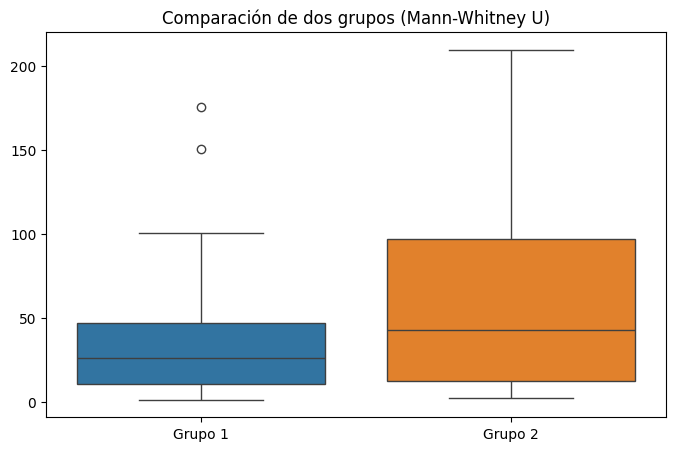

In [12]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Generamos datos para dos grupos (sin normalidad)
np.random.seed(42)
grupo_1 = np.random.exponential(scale=50, size=30)  # Grupo 1
grupo_2 = np.random.exponential(scale=60, size=30)  # Grupo 2

# Realizamos la prueba Mann-Whitney
stat, p_value = stats.mannwhitneyu(grupo_1, grupo_2, alternative="two-sided")

# Resultados
print(f"Estadístico U: {stat:.2f}")
print(f"Valor P: {p_value:.5f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: Hay diferencia significativa entre los grupos.")
else:
    print("No se rechaza H₀: No hay suficiente evidencia para decir que los grupos son diferentes.")

# Visualización
plt.figure(figsize=(8,5))
sns.boxplot(data=[grupo_1, grupo_2])
plt.xticks([0, 1], ["Grupo 1", "Grupo 2"])
plt.title("Comparación de dos grupos (Mann-Whitney U)")
plt.show()

## Prueba de Kruskal-Wallis (Alternativa no paramétrica a ANOVA)

Se usa para comparar **más de dos grupos independientes.**

**Ejemplo: Comparar los ingresos de personas en 3 ciudades diferentes.**

Estadístico H: 0.25
Valor P: 0.88058
No se rechaza H₀: No hay evidencia de diferencias significativas.


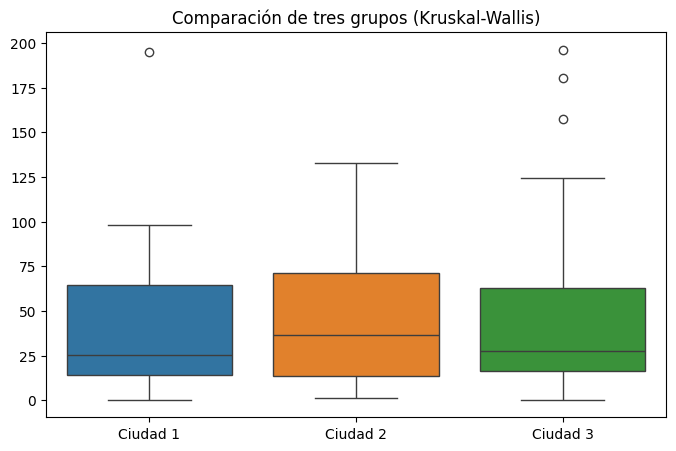

In [13]:
# Generamos datos para 3 ciudades
ciudad_1 = np.random.exponential(scale=45, size=30)
ciudad_2 = np.random.exponential(scale=50, size=30)
ciudad_3 = np.random.exponential(scale=55, size=30)

# Prueba de Kruskal-Wallis
stat, p_value = stats.kruskal(ciudad_1, ciudad_2, ciudad_3)

# Resultados
print(f"Estadístico H: {stat:.2f}")
print(f"Valor P: {p_value:.5f}")

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No se rechaza H₀: No hay evidencia de diferencias significativas.")

# Visualización
plt.figure(figsize=(8,5))
sns.boxplot(data=[ciudad_1, ciudad_2, ciudad_3])
plt.xticks([0, 1, 2], ["Ciudad 1", "Ciudad 2", "Ciudad 3"])
plt.title("Comparación de tres grupos (Kruskal-Wallis)")
plt.show()


## Prueba de Friedman (Alternativa no paramétrica a ANOVA de medidas repetidas)

Se usa para comparar **más de dos grupos independientes.**

**Ejemplo: Comparar los ingresos de personas en 3 ciudades diferentes.**

Estadístico Chi-cuadrado: 1.40
Valor P: 0.49659
No se rechaza H₀: No hay suficiente evidencia para afirmar diferencias.


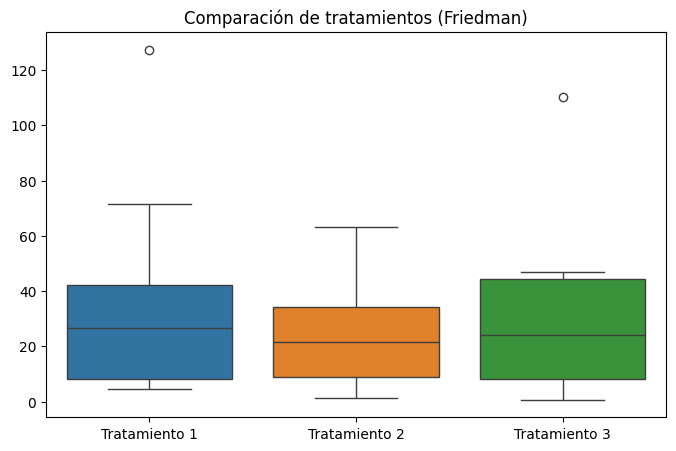

In [14]:
# Generamos datos de 3 tratamientos para los mismos pacientes
pacientes = 10
tratamiento_1 = np.random.exponential(scale=30, size=pacientes)
tratamiento_2 = np.random.exponential(scale=35, size=pacientes)
tratamiento_3 = np.random.exponential(scale=40, size=pacientes)

# Prueba de Friedman
stat, p_value = stats.friedmanchisquare(tratamiento_1, tratamiento_2, tratamiento_3)

# Resultados
print(f"Estadístico Chi-cuadrado: {stat:.2f}")
print(f"Valor P: {p_value:.5f}")

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Hay diferencias significativas entre tratamientos.")
else:
    print("No se rechaza H₀: No hay suficiente evidencia para afirmar diferencias.")

# Visualización
plt.figure(figsize=(8,5))
sns.boxplot(data=[tratamiento_1, tratamiento_2, tratamiento_3])
plt.xticks([0, 1, 2], ["Tratamiento 1", "Tratamiento 2", "Tratamiento 3"])
plt.title("Comparación de tratamientos (Friedman)")
plt.show()


Estas pruebas son útiles cuando los datos no son normales o cuando tenemos muestras pequeñas.

-----------

### Pruebas de Normalidad Multivariada en Python

#### ¿Qué es la Normalidad Multivariada?

La **normalidad multivariada** es una extensión del concepto de normalidad univariada, pero aplicado a **varias variables al mismo tiempo**.

💡 **¿Por qué es importante?**
- Es un **requisito clave** en métodos estadísticos como **ANOVA multivariado (MANOVA)** y **modelos de regresión múltiple**.
- Si los datos no siguen una distribución normal multivariada, ciertos modelos pueden ser **menos confiables**.

---

#### Métodos para evaluar la Normalidad Multivariada
Existen varias pruebas estadísticas y visualizaciones que nos ayudan a evaluar si un conjunto de variables sigue una distribución normal multivariante.

| **Método** | **¿Qué evalúa?** | **Interpretación** |
|-----------|---------------|--------------------|
| **Prueba de Henze-Zirkler** | Diferencia global respecto a la normalidad multivariada. | Si el **p-valor > 0.05**, los datos **siguen** una normal multivariada. |
| **Prueba de Mardia** | Mide **asimetría** y **curtosis** multivariada. | Valores extremos indican **desviaciones de normalidad**. |
| **Q-Q Plot Multivariado** | Visualiza si los datos siguen una distribución normal. | Si los puntos **siguen la línea**, los datos son normales. |
| **Histogramas y KDE** | Observa la forma de la distribución de cada variable. | Distribuciones **sesgadas o con colas largas** pueden ser no normales. |


---
💡 **Ejemplo:** Si estamos analizando un conjunto de datos con **altura, peso, presión arterial, colesterol y glucosa**, queremos saber si estas variables **siguen una distribución normal conjunta**.



## Evaluación con la Prueba de Henze-Zirkler
Esta prueba se basa en una transformación de los datos y mide la desviación de una distribución normal multivariada.

**Hipótesis:**
- **H₀:** Los datos siguen una distribución normal multivariada.
- **H₁:** Los datos **NO** siguen una distribución normal multivariada.


In [15]:
# Instalar pingouin si no está instalado
#!pip install pingouin

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pingouin import multivariate_normality

# Generamos datos con distribución normal multivariada
np.random.seed(42)
mean = [50, 100, 75, 60, 90]  # Medias de las variables
cov = [[200, 50, 30, 20, 25], 
       [50, 300, 40, 35, 30], 
       [30, 40, 150, 25, 20], 
       [20, 35, 25, 100, 15], 
       [25, 30, 20, 15, 250]]  # Matriz de covarianza

data = np.random.multivariate_normal(mean, cov, size=300)

# Convertimos los datos en un DataFrame
df = pd.DataFrame(data, columns=["Altura", "Peso", "Presión Arterial", "Colesterol", "Glucosa"])

# Aplicamos la prueba de Henze-Zirkler
hz_stat, p_value, normal = multivariate_normality(df, alpha=0.05)

# Resultados
print(f"Estadístico Henze-Zirkler: {hz_stat:.4f}")
print(f"Valor P: {p_value:.4f}")
print(f"¿Distribución Normal Multivariada?: {'Sí' if normal else 'No'}")

Estadístico Henze-Zirkler: 0.8874
Valor P: 0.6593
¿Distribución Normal Multivariada?: Sí


---

## Prueba de Mardia (Asimetría y Curtosis)
Otra forma de evaluar la normalidad multivariada es usando la prueba de Mardia, que mide:

- **Asimetría:** Si los datos están sesgados.
- **Curtosis:** Si los datos tienen colas más "pesadas" o "ligeras" que una normal.

In [16]:
from scipy.stats import kurtosis, skew

# Asimetría y curtosis de cada variable
asimetria = skew(df, axis=0)
curtosis_val = kurtosis(df, axis=0, fisher=True)

# Resultados
for i, col in enumerate(df.columns):
    print(f"Variable: {col}")
    print(f"  - Asimetría: {asimetria[i]:.4f}")
    print(f"  - Curtosis: {curtosis_val[i]:.4f}")


Variable: Altura
  - Asimetría: -0.0524
  - Curtosis: -0.1865
Variable: Peso
  - Asimetría: 0.0191
  - Curtosis: -0.2329
Variable: Presión Arterial
  - Asimetría: -0.0642
  - Curtosis: -0.2688
Variable: Colesterol
  - Asimetría: 0.2213
  - Curtosis: 0.2325
Variable: Glucosa
  - Asimetría: -0.0588
  - Curtosis: 0.1046


### Interpretación

 -  Si la asimetría y la curtosis están cerca de 0, los datos tienen una distribución normal.
 -  Si los valores son muy grandes o pequeños, los datos NO son normales.


---

## Q-Q Plot Multivariado
Una forma visual de evaluar la normalidad es con Q-Q plots.

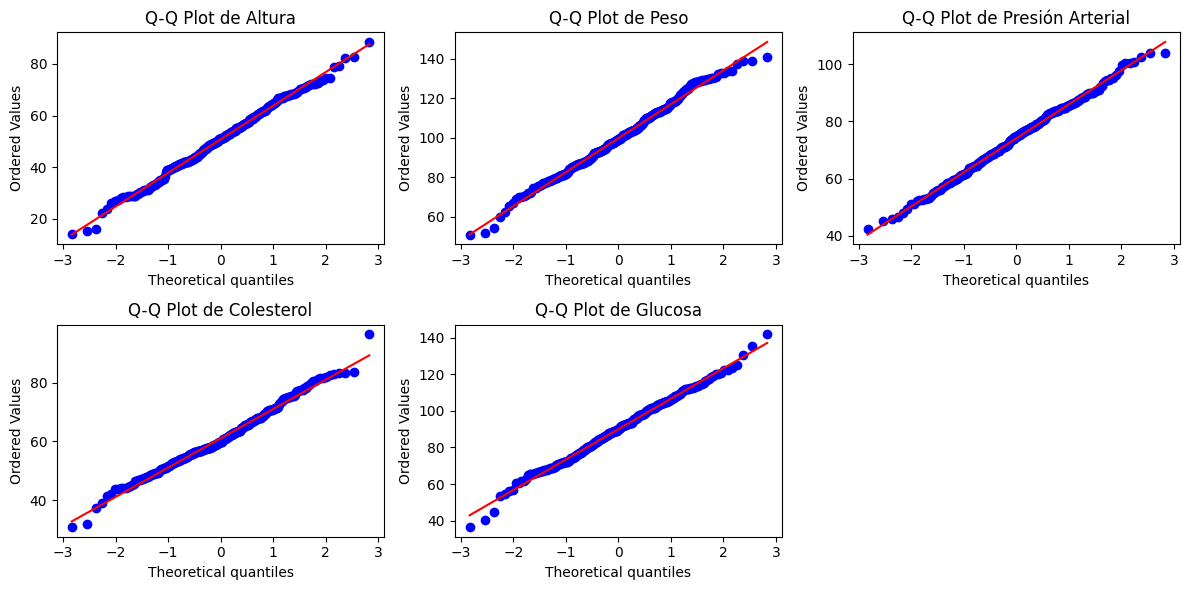

In [17]:
import scipy.stats as stats

# Q-Q Plots para cada variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {col}")

plt.tight_layout()
plt.show()


### Interpretación

 -  Si los puntos siguen la línea, los datos son normales.
 -  Si los puntos se desvían, hay sesgo o curtosis anormal.

---

## Histogramas y KDE
Para verificar la forma de la distribución de cada variable, usamos histogramas con KDE.

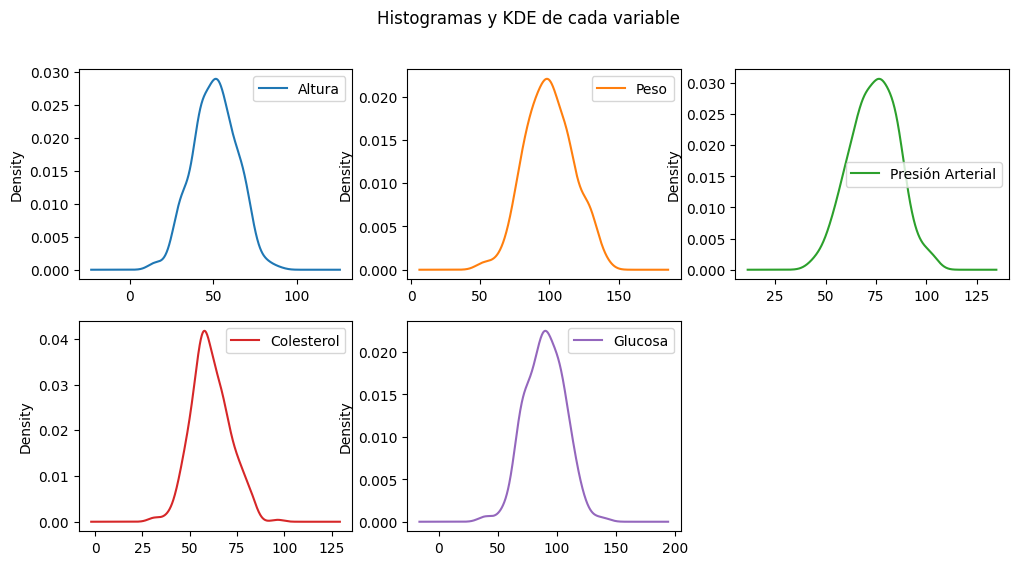

In [18]:
# Histogramas con KDE
df.plot(kind="density", subplots=True, layout=(2, 3), figsize=(12, 6), sharex=False)
plt.suptitle("Histogramas y KDE de cada variable")
plt.show()


## Histogramas y KDE
Para verificar la forma de la distribución de cada variable, usamos histogramas con KDE.

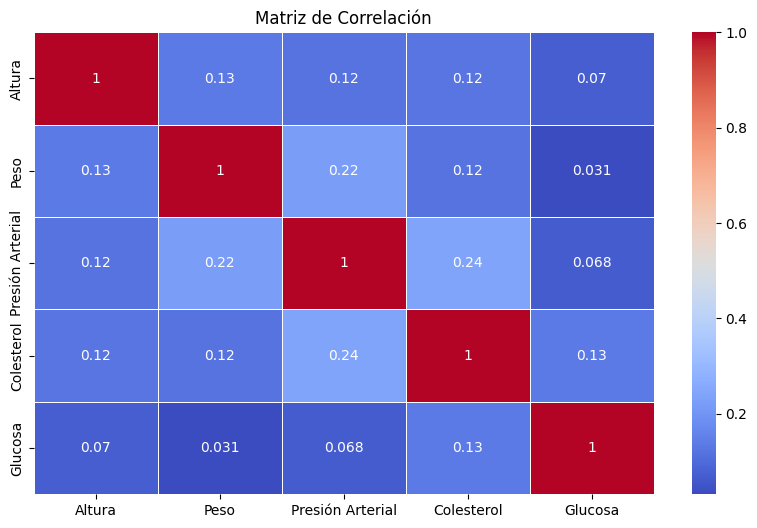

In [19]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


###  Conclusiones

| **Prueba** | **Interpretación** |
|------------|--------------------|
| **Henze-Zirkler** | Si el valor **p > 0.05**, los datos son **normales**. |
| **Mardia (Asimetría y Curtosis)** | Si hay asimetría o curtosis **alta**, los datos **no son normales**. |
| **Q-Q Plot** | Si los puntos **siguen la línea**, hay **normalidad**. |
| **Histogramas** | Permiten ver **la forma** de la distribución. |
| **Matriz de Correlación** | Si hay correlaciones **altas**, puede afectar la normalidad. |

Si alguna de estas pruebas indica **no normalidad**, podemos:
- Aplicar **transformaciones** (log, Box-Cox).
- Usar **pruebas no paramétricas**.

---

### Resumen Final
✅ **Si vamos a usar modelos multivariados, primero verificamos la normalidad**.  
✅ **Usamos la prueba de Henze-Zirkler y la prueba de Mardia**.  
✅ **Si los datos NO son normales**, usamos **pruebas no paramétricas** o **transformamos los datos**.


---
---

## ¿Qué son los Outliers?

Un **outlier** es un dato que **se aleja significativamente del resto** de los valores en un conjunto de datos. Dependiendo del contexto, pueden interpretarse como:

  *  Atípico
  *  Destacado
  *  Excepcional
  *  Anormal
  *  Valor Extremo, Valor anómalo, valor aberrante!!

Eso nos da una idea, ¿no?

----

## **🔍 Detección de Outliers**
Detectar outliers es crucial porque **pueden distorsionar los resultados** de un modelo de Machine Learning.  

Por ejemplo:
- En **Regresión Lineal**, pueden **afectar la pendiente** de la línea de tendencia.
- En **algoritmos de ensamble**, pueden provocar **predicciones incorrectas**.

### **📊 ¿Cómo Detectar Outliers?**
Podemos detectar outliers usando:

1. **Métodos estadísticos**:  
   - **IQR (Rango intercuartílico)** → Filtra valores fuera del percentil 1.5.  
   - **Z-score** → Identifica valores que se alejan de la media en más de 3 desviaciones estándar.


2. **Métodos gráficos**:
   - **Boxplots** → Muestran valores extremos en 1D.
   - **Histogramas** → Detectan distribuciones sesgadas.
   - **Gráficos de dispersión** → Identifican patrones extraños en 2D o más dimensiones.


3. **Modelos avanzados**:
   - **DBSCAN** → Detecta clusters y valores aislados.
   - **Isolation Forest** → Aprende la distribución de los datos y detecta anómalos.

---

## **📉 Outliers Buenos vs Outliers Malos**
No todos los outliers son malos. Hay tres tipos:

| **Tipo**        | **Descripción** | **Ejemplo** |
|---------------|---------------|------------|
| **🛑 Error**  | Datos incorrectos por problemas de carga o medición. | Una edad de 160 años en un dataset de personas. |
| **🔗 Límites**  | Datos reales pero extremos que pueden afectar el modelo. | Una transacción bancaria muy grande en una población de compras pequeñas. |
| **📌 Punto de Interés** | Datos que queremos analizar porque representan eventos raros o importantes. | Detectar fraudes con transacciones atípicas. |

---

## **📏 Outliers en Diferentes Dimensiones**
### **✅ Unidimensional (1D)**
Analizamos **una sola variable**.  
Ejemplo: Usamos **Boxplots** para ver si la edad de algunos clientes es **anormalmente alta o baja**.

### **✅ Bidimensional (2D)**
Analizamos **dos variables** y cómo se relacionan.  
Ejemplo: Un **gráfico de dispersión** de salario vs. años de experiencia para ver si hay sueldos atípicos.

### **✅ Multidimensional (nD)**
Analizamos **varias variables a la vez**.  
Ejemplo: **Modelos de detección de anomalías** como **DBSCAN o Isolation Forest** para identificar fraudes en múltiples atributos financieros.

---

## **🎯 Conclusión**
🔹 **Detectar outliers es clave para mejorar modelos de ML**.  
🔹 **No todos los outliers deben eliminarse**. Depende de si representan errores o información valiosa.  
🔹 **Existen múltiples métodos para detectarlos**: estadísticos, gráficos y algorítmicos.  
🔹 **La detección de outliers en más de 2 dimensiones** requiere modelos avanzados.

-----------

### Outliers en 1 dimensión

Si analizáramos una sola variable, por ejemplo *edad*, veremos donde se concentran la mayoría de muestras y los posibles valores *extremos*. Pasemos a un ejemplo...

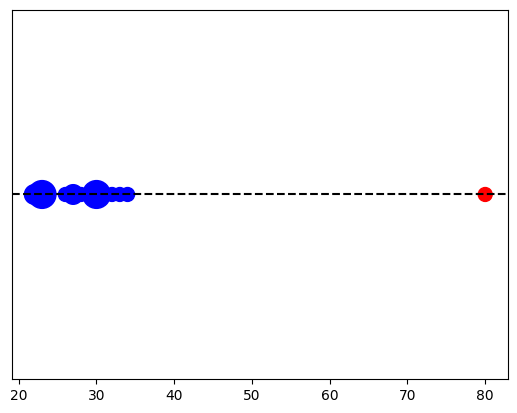

In [20]:
import matplotlib.pyplot as plt
import numpy as np
 
edades = np.array([22,22,23,23,23,23,26,27,27,28,30,30,30,30,31,32,33,34,80])
edad_unique, counts = np.unique(edades, return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

-------

### Outliers en 2 Dimensiones

Ahora supongamos que tenemos 2 variables: edad e ingresos. Hagamos una gráfica en 2D. Además, usaremos una fórmula para trazar un círculo que delimitará los valores outliers: Los valores que superen el valor de la *media más 2 desvíos estándar* (el área del círculo) quedarán en rojo.

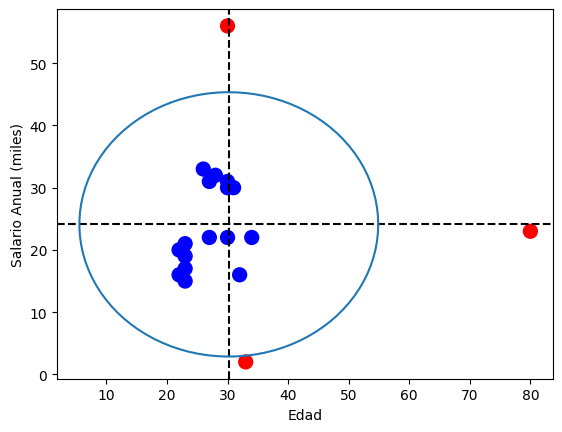

In [21]:
from math import pi
 
salario_anual_miles = np.array([16,20,15,21,19,17,33,22,31,32,56,30,22,31,30,16,2,22,23])
media = (salario_anual_miles).mean()
std_x = (salario_anual_miles).std()*2
media_y = (edades).mean()
std_y = (edades).std()*2
 
colors = ['blue']*len(salario_anual_miles)
for index, x in enumerate(salario_anual_miles):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
        
        
        
        
plt.scatter(edades, salario_anual_miles, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
plt.show()

<Axes: >

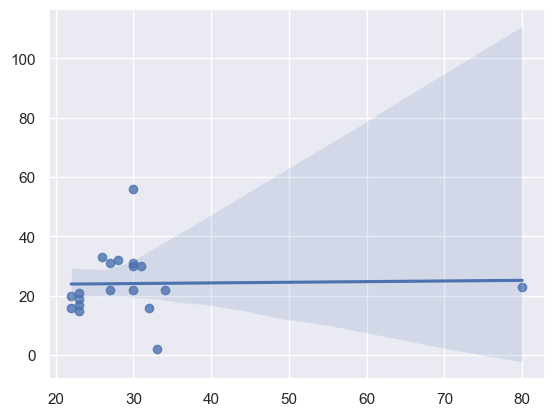

In [22]:
import seaborn as sns

#CON OUTLIERS

sns.set(color_codes=True)
sns.regplot(x=edades, y=salario_anual_miles)

<Axes: >

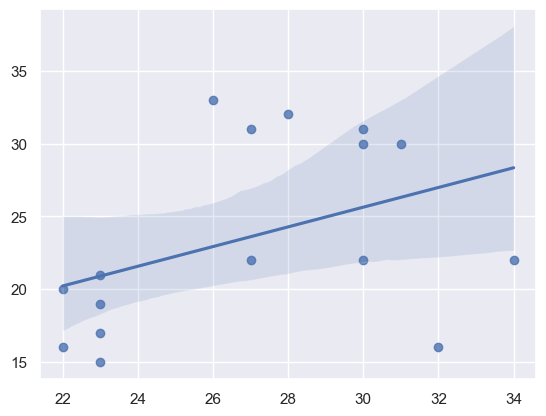

In [23]:
# SIN OUTLIERS

edades_fix=[]
salario_anual_miles_fix=[]

for index, x in enumerate(salario_anual_miles):
    y= edades[index]
    if abs(x-media) > std_x or abs(y-media_y) > std_y:
        pass
    else:
        edades_fix.append(y)
        salario_anual_miles_fix.append(x)
        
sns.regplot(x=np.array(edades_fix), y=np.array(salario_anual_miles_fix))

----
### Outliers en 3 Dimensiones

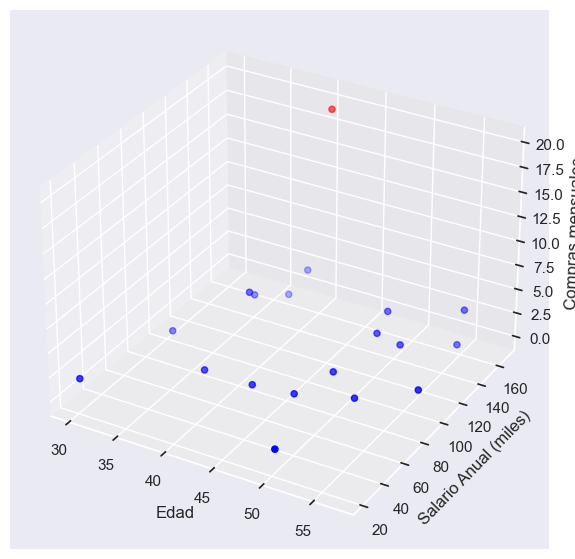

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')  # Create a new 3D subplot

compras_mes = np.array([1,2,1,20,1,0,3,2,3,0,5,3,2,1,0,1,2,2,2])
media_z = compras_mes.mean()
std_z = compras_mes.std() * 2

colors = ['blue'] * len(compras_mes)  # Initialize colors as blue for all points

for index, x in enumerate(compras_mes):
    if abs(x - media_z) > std_z:
        colors[index] = 'red'

# Generate some dummy data for edades and salario_anual_miles as they are not provided in your code
edades = np.random.randint(20, 60, len(compras_mes))
salario_anual_miles = np.random.randint(20, 200, len(compras_mes))

ax.scatter(edades, salario_anual_miles, compras_mes, s=20, c=colors)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario Anual (miles)')
ax.set_zlabel('Compras mensuales')

plt.show()


-----
### ¿Por qué necesitamos detectar valores atípicos?

Los valores atípicos pueden afectar los resultados de nuestro análisis y modelado estadístico de manera drástica. Consulte la imagen a continuación para visualizar lo que le sucede a un modelo cuando hay valores atípicos presentes en comparación con cuando se han tratado:

---

Nuestra tendencia es utilizar métodos sencillos como diagramas de caja, histogramas y diagramas de dispersión para detectar valores atípicos. 

Pero los algoritmos de detección de valores atípicos dedicados son extremadamente valiosos en campos que procesan grandes cantidades de datos y requieren un medio para realizar el reconocimiento de patrones en conjuntos de datos más grandes.

![img](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/02/Outliers.jpeg)

------

# 2.11 🎯 A/B Testing y su Aplicación en Ciencia de Datos

## 📌 ¿Qué es el A/B Testing?
El **A/B Testing** es un **experimento controlado** que compara **dos versiones** de algo (una web, un anuncio, un email, etc.) para ver cuál funciona mejor.

**Objetivo**: Determinar **si una versión tiene un impacto significativo** sobre la otra basándonos en datos.

**Ejemplo**:  
- Un sitio web prueba **dos botones**:  
  - **A (Azul)** → 1000 usuarios, 50 clics (5% tasa de conversión).  
  - **B (Rojo)** → 1000 usuarios, 80 clics (8% tasa de conversión).  

La pregunta es: ¿la versión B realmente es mejor o la diferencia es **por azar**?  

Para responder, usamos **estadística**.

---

## Pasos en un A/B Testin
### Definir el Objetivo
📌 ¿Qué métrica queremos mejorar?  
Ejemplo: Aumentar la tasa de clics (CTR) en un anuncio.

### Dividir a los Usuarios
📌 Se divide el tráfico en **dos grupos aleatorios**:  
- **Grupo A** → Ve la versión original (control).  
- **Grupo B** → Ve la versión nueva (tratamiento).  

**Importante**: La asignación debe ser **aleatoria** para evitar sesgos.

### Recolectar Datos
📌 Medimos el comportamiento de los usuarios en ambas versiones.  
Ejemplo:  
- CTR del botón A → **5%**  
- CTR del botón B → **8%**  

### Aplicar Estadística
Usamos **pruebas de hipótesis** para ver si la diferencia es significativa.

📌 **Hipótesis nula (H₀)**: No hay diferencia entre A y B.  
📌 **Hipótesis alternativa (H₁)**: Hay una diferencia real entre A y B.

Se usa una **prueba z o t de Student** para comparar proporciones.

### Interpretar Resultados
Si el **p-valor** < 0.05 → **Rechazamos H₀** (la diferencia es significativa).  
Si el **p-valor** > 0.05 → **No hay suficiente evidencia** para decir que B es mejor que A.


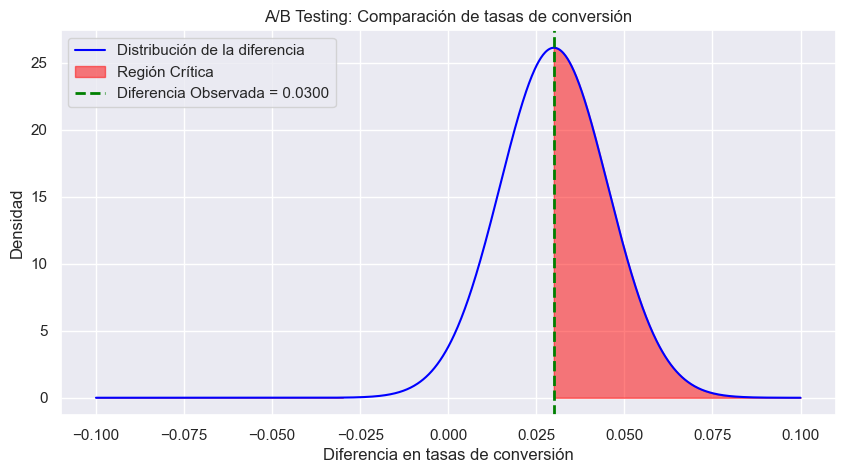

Prueba Z: 1.96
Valor P: 0.04964
Rechazamos H₀: La versión B tiene una tasa de conversión significativamente diferente a la versión A.


In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulación de datos: usuarios y conversiones
np.random.seed(42)
usuarios_A = 1000  # Usuarios que vieron la versión A
conversiones_A = 120  # Conversiones en la versión A

usuarios_B = 1000  # Usuarios que vieron la versión B
conversiones_B = 150  # Conversiones en la versión B

# Tasas de conversión
p_A = conversiones_A / usuarios_A
p_B = conversiones_B / usuarios_B

# Diferencia en tasas de conversión
diferencia = p_B - p_A

# Prueba Z para diferencia de proporciones
p_pool = (conversiones_A + conversiones_B) / (usuarios_A + usuarios_B)
se = np.sqrt(p_pool * (1 - p_pool) * (1/usuarios_A + 1/usuarios_B))
z_score = diferencia / se
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Prueba de dos colas

# Visualización de distribuciones
x = np.linspace(-0.1, 0.1, 1000)
y = stats.norm.pdf(x, diferencia, se)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Distribución de la diferencia", color="blue")

# Regiones críticas (α = 0.05)
alpha = 0.05
z_critico = stats.norm.ppf(1 - alpha/2)
x_critico_izq = np.linspace(-0.1, -z_critico*se, 100)
x_critico_der = np.linspace(z_critico*se, 0.1, 100)

plt.fill_between(x_critico_izq, stats.norm.pdf(x_critico_izq, diferencia, se), color='red', alpha=0.5, label="Región Crítica")
plt.fill_between(x_critico_der, stats.norm.pdf(x_critico_der, diferencia, se), color='red', alpha=0.5)

# Línea de la diferencia observada
plt.axvline(diferencia, color="green", linestyle="dashed", linewidth=2, label=f"Diferencia Observada = {diferencia:.4f}")

plt.legend()
plt.title("A/B Testing: Comparación de tasas de conversión")
plt.xlabel("Diferencia en tasas de conversión")
plt.ylabel("Densidad")
plt.show()

# Resultados
print(f"Prueba Z: {z_score:.2f}")
print(f"Valor P: {p_value:.5f}")

# Evaluación de hipótesis
if p_value < alpha:
    print("Rechazamos H₀: La versión B tiene una tasa de conversión significativamente diferente a la versión A.")
else:
    print("No se rechaza H₀: No hay suficiente evidencia para decir que la versión B es diferente de la versión A.")


## ¿Cuándo es útil el A/B Testing?

- **Optimizar tasas de conversión en marketing digital**  
- **Probar diferentes interfaces de usuario** 
- **Mejorar algoritmos de recomendación**  
- **Evaluar cambios en productos y servicios** 

---

## Precauciones en A/B Testing

1. **Tamaño de Muestra Suficiente** → Si hay pocos datos, los resultados pueden ser falsos.  
2. **Evitar sesgos** → Asegurar que los grupos sean **aleatorios y homogéneos**.  
3. **Efecto de duración** → Un test corto puede no captar efectos a largo plazo.  
4. **Multiples pruebas** → Si pruebas muchas cosas a la vez, aumentas el riesgo de falsos positivos (**error Tipo I**).  

---

## Conclusión

✅ **A/B Testing permite tomar decisiones basadas en datos en lugar de intuiciones.**  
✅ **Es una herramienta clave en marketing, diseño UX y análisis de producto.**  
✅ **La estadística es fundamental para interpretar los resultados correctamente.**  


* Valores críticos [Shapiro-Wilk test](https://scistatcalc.blogspot.com/2013/09/critical-value-of-w-statistic.html?m=0)
* Entendimiento de pruebas de hipótesis: [p-value y alpha](https://blog.minitab.com/en/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics)

-----------

* Artículo de [pruebas paramétricas robustas](https://onlinelibrary.wiley.com/doi/pdf/10.1002/art.24669)
* S.P. Verma and A. Quiroz-Ruiz (2006) [Critical values for six Dixon tests for outliers in normal samples up to sizes 100, and applications in science and engineering](https://www.researchgate.net/publication/28113620_Critical_values_for_six_Dixon_tests_for_outliers_in_normal_samples_up_to_sizes_100_and_applications_in_science_and_engineering)
* [Dixon Test N7 (Q)](http://www.statistics4u.com/fundstat_eng/cc_outlier_tests_dixon.html)